In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance 
sns.set()

In [2]:
# data source - https://www.dropbox.com/sh/p7yajxraam3aoof/AADAP4EtkVSsEGp6gNsCO77Za/Section%203/S_3_L_11?dl=0&subfolder_nav_tracking=1
raw_csv_data = pd.read_csv('Index2018.csv')
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df_comp = raw_csv_data.copy()

## Examining the data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

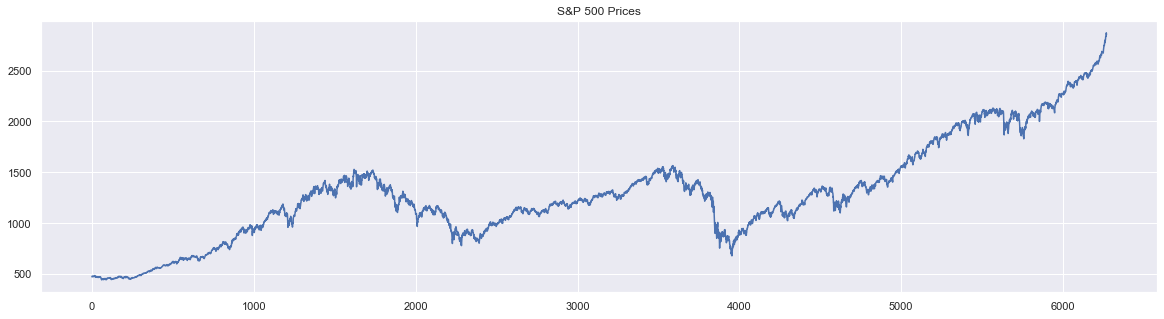

In [7]:
df_comp.spx.plot(figsize=(20, 5), title="S&P 500 Prices")
plt.show()

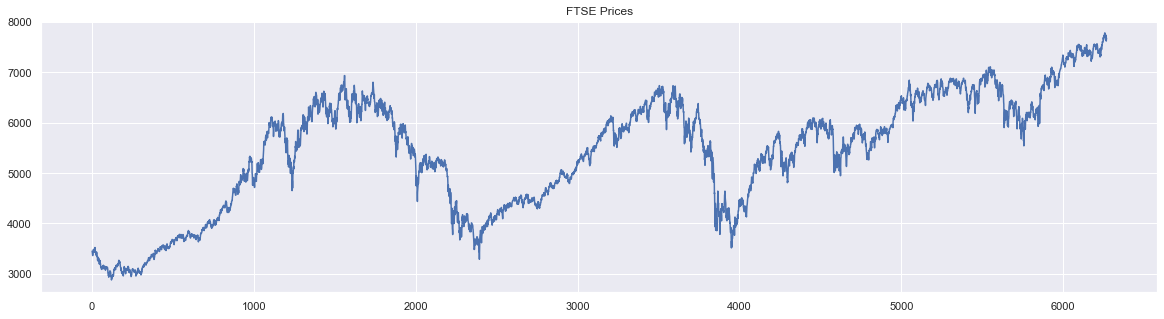

In [8]:
df_comp.ftse.plot(figsize=(20, 5), title="FTSE Prices")
plt.show()

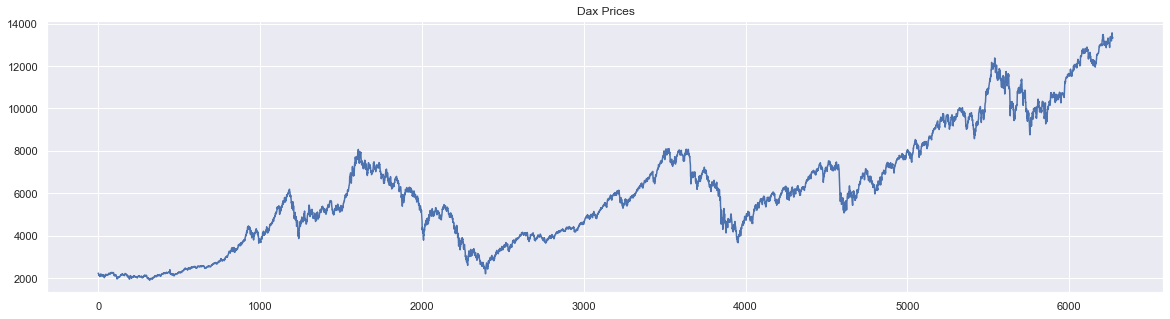

In [9]:
df_comp.dax.plot(figsize=(20, 5), title="Dax Prices")
plt.show()

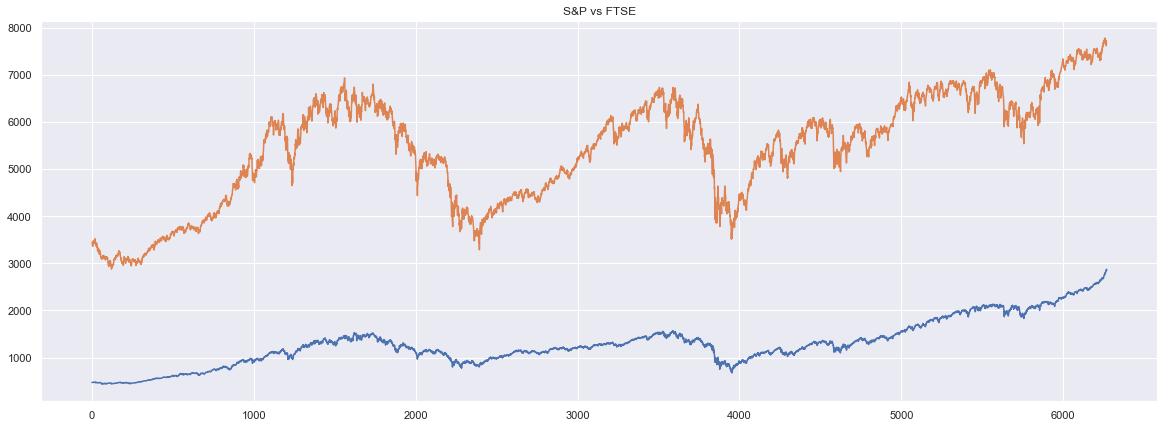

In [10]:
df_comp.spx.plot(figsize=(20, 7), title="S&P 500 Prices")
df_comp.ftse.plot(figsize=(20, 7), title="FTSE Prices")
plt.title("S&P vs FTSE")
plt.show()

## The QQ plot - Quantile Quantile Plot

- used to determine wether a data set is distributed a certain way
- usually showcases how the data fits a Normal Distribution
- it takes a ll the values a variable can take and arranges them in accending order
- y axis represents prices, x = theoretical quantiles or how many standard deviations away from the mean these values are from mean. the red line shows how the data points should be for normal distribution

In [11]:
import scipy.stats
import pylab
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

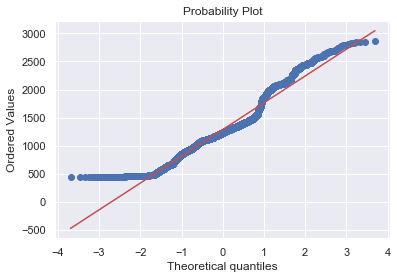

In [12]:
scipy.stats.probplot(df_comp.spx, plot=pylab)
pylab.show()

## Data transformation

In [13]:
df_comp.date.describe()

count           6269
unique          6269
top       03/05/1994
freq               1
Name: date, dtype: object

In [14]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [15]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [17]:
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Setting the desired Frequency

In [18]:
df_comp = df_comp.asfreq('d')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [19]:
df_comp = df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Handling missing values

In [20]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [21]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [22]:
df_comp.ftse = df_comp.ftse.fillna(method='bfill')
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [23]:
df_comp.dax = df_comp.dax.fillna(df_comp.dax.mean())
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

# Simplifying the dataset

In [24]:
df_comp['market_value'] = df_comp.ftse

In [25]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,5423.690398
std,487.868210,2752.604984,1145.568370,4043.122953,1145.568370
min,438.920000,1911.700000,2876.600000,7054.980000,2876.600000
25%,992.715221,4070.460000,4487.880000,10709.290000,4487.880000
50%,1233.761241,5774.380000,5663.300000,15028.170000,5663.300000
75%,1460.250000,7442.660000,6304.630175,17860.470000,6304.630175
max,2872.867839,13559.600000,7778.637689,24124.150000,7778.637689


In [26]:
df = df_comp.copy()

In [27]:
# del df['spx'], df['dax'] , df['ftse'], df['nikkei']
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,5423.690398
std,487.868210,2752.604984,1145.568370,4043.122953,1145.568370
min,438.920000,1911.700000,2876.600000,7054.980000,2876.600000
25%,992.715221,4070.460000,4487.880000,10709.290000,4487.880000
50%,1233.761241,5774.380000,5663.300000,15028.170000,5663.300000
75%,1460.250000,7442.660000,6304.630175,17860.470000,6304.630175
max,2872.867839,13559.600000,7778.637689,24124.150000,7778.637689


In [28]:
df.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,5423.690398
std,487.868210,2752.604984,1145.568370,4043.122953,1145.568370
min,438.920000,1911.700000,2876.600000,7054.980000,2876.600000
25%,992.715221,4070.460000,4487.880000,10709.290000,4487.880000
50%,1233.761241,5774.380000,5663.300000,15028.170000,5663.300000
75%,1460.250000,7442.660000,6304.630175,17860.470000,6304.630175
max,2872.867839,13559.600000,7778.637689,24124.150000,7778.637689


# Splitting the data

In [29]:
size = int(len(df_comp) * 0.8)
df_test = df.iloc[size:]
df = df.iloc[:size]

In [30]:
df.tail()

,spx,dax,ftse,nikkei,market_value
date,,,,,
2013-04-01,1562.173837,7795.31,6411.74,12135.02,6411.74
2013-04-02,1570.252238,7943.87,6490.66,12003.43,6490.66
2013-04-03,1553.686978,7874.75,6420.28,12362.20,6420.28
2013-04-04,1559.979316,7817.39,6344.11,12634.54,6344.11
2013-04-05,1553.278930,7658.75,6249.77,12833.64,6249.77


In [31]:
df_test.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
2013-04-08,1563.071269,7662.64,6276.94,13192.59,6276.94
2013-04-09,1568.607909,7637.51,6313.20,13192.35,6313.20
2013-04-10,1587.731827,7810.63,6387.37,13288.13,6387.37
2013-04-11,1593.369863,7871.63,6416.14,13549.16,6416.14
2013-04-12,1588.854623,7744.77,6384.39,13485.14,6384.39


# Updating the data from yfinance
- just to use latest data

In [32]:
# Using the .download() method to get our data

raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", #The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
                              start = "1994-01-07", #The starting date of our data set
                              end = "2019-09-27", #The ending date of our data set (at the time of upload, this is the current date)
                              interval = "1d", #The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day. 
                              group_by = 'ticker', #The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
                              auto_adjust = True, #Automatically adjuss the closing prices for each period. 
                              treads = True) #Whether to use threads for mass downloading. 

[*********************100%***********************]  4 of 4 completed


In [33]:
# Creating a back up copy in case we remove/alter elements of the data by mistake
df_comp = raw_data.copy()

In [34]:
# Adding new columns to the data set
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

In [35]:
df_comp = df_comp.iloc[1:] # Removing the first elements, since we always start 1 period before the first, due to time zone differences of closing prices
del df_comp['^N225']  # Removing the original tickers of the data set
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b') # Setting the frequency of the data
df_comp=df_comp.fillna(method='ffill') # Filling any missing values

In [36]:
df_comp.head() # Displaying the first 5 elements to make sure the data was scrapped correctly

,spx,dax,ftse,nikkei
,,,,
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


In [37]:
df_comp.tail() # Making sure of the last day we're including in the series

,spx,dax,ftse,nikkei
,,,,
Date,,,,
2019-09-20,2992.070068,12468.009766,7344.899902,22079.089844
2019-09-23,2991.780029,12342.330078,7326.100098,22079.089844
2019-09-24,2966.600098,12307.150391,7291.399902,22098.839844
2019-09-25,2984.870117,12234.179688,7290.000000,22020.150391
2019-09-26,2977.620117,12288.540039,7351.100098,22048.240234


# White noise

In [38]:
# generate random white noise data
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [39]:
df['wn'] = wn
df.describe()

,spx,dax,ftse,nikkei,market_value,wn
count,5021.000000,5021.000000,5021.000000,5017.000000,5021.000000,5021.000000
mean,1091.651926,4983.708716,5089.701492,13878.186121,5089.701492,5074.937544
std,292.559287,1714.071511,1017.113459,4034.577272,1017.113459,1029.720849
min,438.920000,1911.700000,2876.600000,7054.980000,2876.600000,1122.794617
25%,914.620000,3733.930000,4274.040000,10220.850000,4274.040000,4370.491928
50%,1144.650000,5124.130000,5266.060000,13493.350000,5266.060000,5068.867689
75%,1316.280729,6342.420000,5917.800000,17248.890000,5917.800000,5779.453006
max,1570.252238,8105.690000,6930.200000,22666.700000,6930.200000,8635.354076


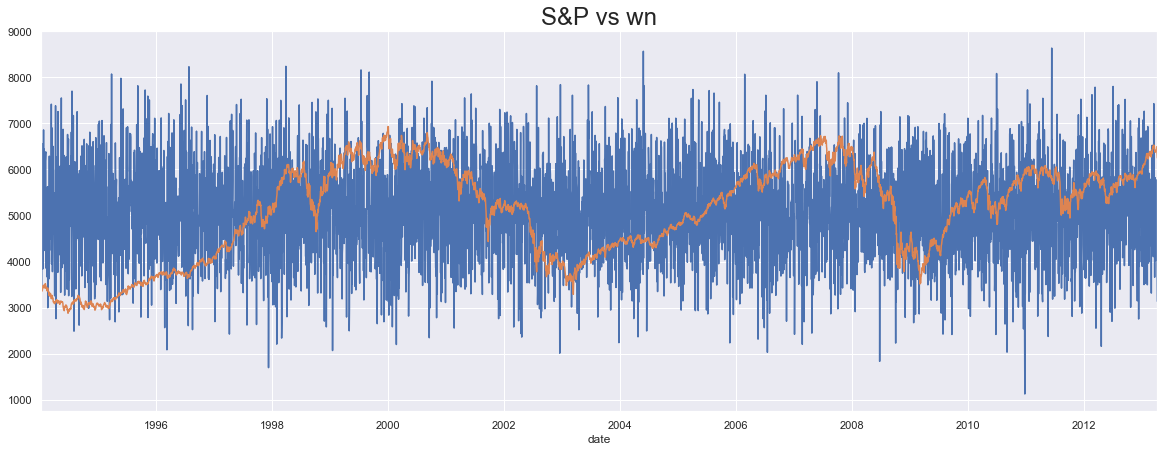

In [40]:
df.wn.plot(figsize=(20, 7), title="White noise")
df.market_value.plot(figsize=(20, 7), title="S&P 500 Prices")

plt.title("S&P vs wn", size=24)
plt.show()

# Random walk

In [41]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [42]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [43]:
df['rw'] = rw.price

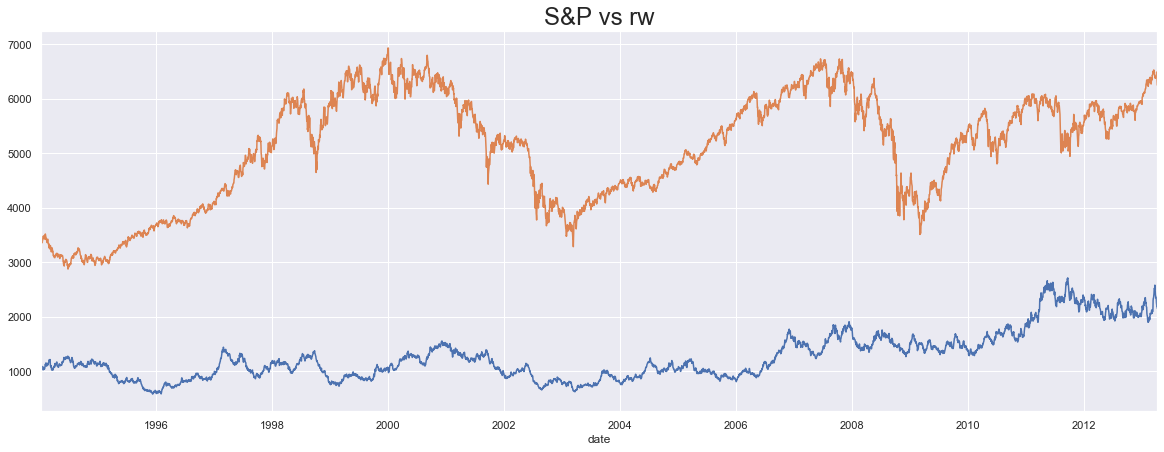

In [44]:
df.rw.plot(figsize=(20, 7), title="Random walk")
df.market_value.plot(figsize=(20, 7), title="S&P 500 Prices")

plt.title("S&P vs rw", size=24)
plt.show()

# Stationarity

### ADF test
H0 -  series is not stationary
H1 - series is stationary

In [45]:
sts.adfuller(df.market_value)

(-1.9049356385026301,
 0.32974280493188635,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54856.46568853504)

### Results 
- t statistic is greater than 1, 5, 10% ranges therefore series is not stationary
- p value = 0.4 therefore data is not stationary as we cannot reject the null hypothesis
- Lags used = 18. there is some auto-correlation going back 18 time steps (useful to decide the appropriate model)
- lower last value, easier to make prediction into future


## Seasonalilty

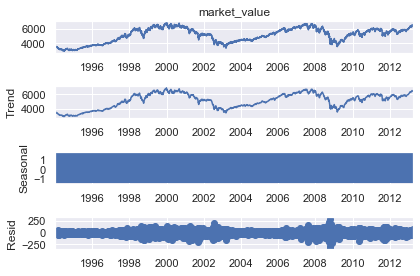

In [46]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

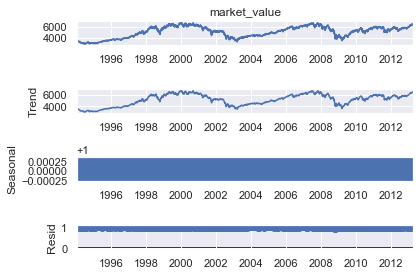

In [47]:
s_dec_additive = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_additive.plot()
plt.show()

## ACF

In [48]:
import statsmodels.graphics.tsaplots as sgt
from scipy.stats import chi2

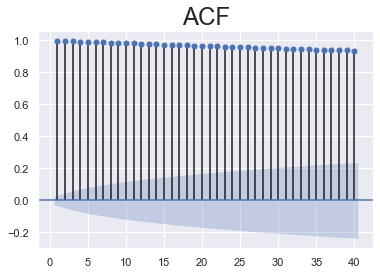

In [49]:
sgt.plot_acf(df.market_value, lags = 40 , zero=False)
plt.title("ACF", size=24)
plt.show()

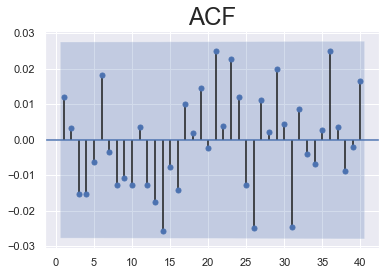

In [50]:
sgt.plot_acf(df.wn, lags = 40 , zero=False)
plt.title("ACF", size=24)
plt.show()

## PACF

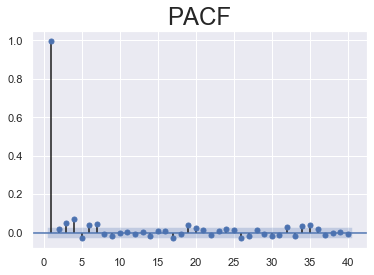

In [51]:
sgt.plot_pacf(df.market_value, lags = 40 , zero=False, method=('ols'))
plt.title("PACF", size=24)
plt.show()

In [52]:
from statsmodels.tsa.arima_model import ARMA

# The AR(1) Model

In [53]:
model_ar = ARMA(df.market_value, order= (1, 0))

In [54]:
model_r = model_ar.fit()

In [55]:
model_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Tue, 02 Feb 2021   AIC                          55251.196
Time:                        16:24:41   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5052.7722    486.615     10.384      0.000    4099.025    6006.519
ar.L1.market_value     0.9985      0.001   1298.936      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## The AR(2) Model

In [56]:
model_ar2 = ARMA(df.market_value, order= (2, 0))

In [57]:
model_r2 = model_ar2.fit()

In [58]:
model_r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.868
Method:                       css-mle   S.D. of innovations             59.249
Date:                Tue, 02 Feb 2021   AIC                          55251.735
Time:                        16:24:42   BIC                          55277.821
Sample:                    01-07-1994   HQIC                         55260.876
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5083.3994    495.293     10.263      0.000    4112.644    6054.155
ar.L1.market_value     0.9814      0.014     69.593      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.212      0.225      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.3783           +0.0000j           58.3783            0.5000
-----------------------------------------------------------------------------
"""

# The AR(3)

In [59]:
model_ar3 = ARMA(df.market_value, order= (3, 0))

model_r3 = model_ar3.fit()

model_r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.649
Method:                       css-mle   S.D. of innovations             59.176
Date:                Tue, 02 Feb 2021   AIC                          55241.298
Time:                        16:24:43   BIC                          55273.905
Sample:                    01-07-1994   HQIC                         55252.724
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.7017    520.869      9.772      0.000    4068.817    6110.587
ar.L1.market_value     0.9805      0.014     69.620      0.000       0.953       1.008
ar.L2.market_value    -0.0317      0.020     -1.606      0.108      -0.070       0.007
ar.L3.market_value     0.0498      0.014      3.529      0.000       0.022       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1822           -4.4758j            4.4795           -0.2565
AR.3           -0.1822           +4.4758j            4.4795            0.2565
-----------------------------------------------------------------------------
"""

# The AR(4)

In [60]:
model_ar4 = ARMA(df.market_value, order= (3, 0))

model_r4 = model_ar4.fit()

model_r4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.649
Method:                       css-mle   S.D. of innovations             59.176
Date:                Tue, 02 Feb 2021   AIC                          55241.298
Time:                        16:24:43   BIC                          55273.905
Sample:                    01-07-1994   HQIC                         55252.724
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.7017    520.869      9.772      0.000    4068.817    6110.587
ar.L1.market_value     0.9805      0.014     69.620      0.000       0.953       1.008
ar.L2.market_value    -0.0317      0.020     -1.606      0.108      -0.070       0.007
ar.L3.market_value     0.0498      0.014      3.529      0.000       0.022       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1822           -4.4758j            4.4795           -0.2565
AR.3           -0.1822           +4.4758j            4.4795            0.2565
-----------------------------------------------------------------------------
"""

# log likelihood or LLR test

In [61]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf # extract the log likelihood
    LR = (2*(L2-L1)) # test statistic
    p = chi2.sf(LR, DF).round(3) # get p value
    return p

# Comparing Higher-lag AR Models

In [62]:
LLR_test(model_ar2, model_ar3)

0.0

In [63]:
LLR_test(model_ar3, model_ar4)

1.0

In [64]:
LLR_test(model_ar, model_ar4, DF=3)

0.003

# Using Returns

In [65]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df['returns'].head()

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
Freq: B, Name: returns, dtype: float64

In [66]:
df = df.iloc[1:]

In [67]:
sts.adfuller(df.returns)

(-12.786930957227309,
 7.213255047803417e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15700.846444346233)

#### returns hence are stationary process

# ACF for returns

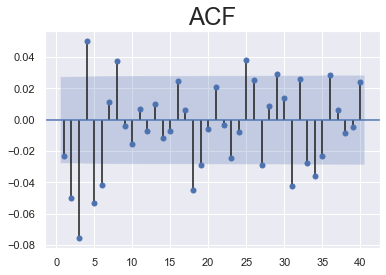

In [68]:
sgt.plot_acf(df.returns, lags = 40 , zero=False)
plt.title("ACF", size=24)
plt.show()

## PACF

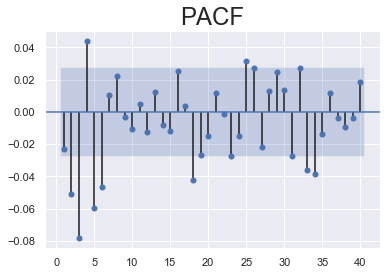

In [69]:
sgt.plot_pacf(df.returns, lags = 40 , zero=False, method=('ols'))
plt.title("PACF", size=24)
plt.show()

# AR models on returns

In [70]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0))

In [71]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [72]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.756
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 02 Feb 2021   AIC                          15865.512
Time:                        16:24:47   BIC                          15885.076
Sample:                    01-10-1994   HQIC                         15872.368
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.158      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.627      0.104      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.5596           +0.0000j           43.5596            0.5000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models for Returns

In [73]:
model_ret_ar_2 = ARMA(df.returns, order = (2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.305
Method:                       css-mle   S.D. of innovations              1.173
Date:                Tue, 02 Feb 2021   AIC                          15854.609
Time:                        16:24:47   BIC                          15880.694
Sample:                    01-10-1994   HQIC                         15863.749
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.221      0.222      -0.011       0.049
ar.L1.returns    -0.0241      0.014     -1.712      0.087      -0.052       0.003
ar.L2.returns    -0.0507      0.014     -3.594      0.000      -0.078      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2381           -4.4360j            4.4424           -0.2585
AR.2           -0.2381           +4.4360j            4.4424            0.2585
-----------------------------------------------------------------------------
"""

In [74]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [75]:
model_ret_ar_3 = ARMA(df.returns, order = (3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7907.795
Method:                       css-mle   S.D. of innovations              1.169
Date:                Tue, 02 Feb 2021   AIC                          15825.590
Time:                        16:24:47   BIC                          15858.196
Sample:                    01-10-1994   HQIC                         15837.016
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.327      0.185      -0.009       0.047
ar.L1.returns    -0.0281      0.014     -2.000      0.046      -0.056      -0.001
ar.L2.returns    -0.0526      0.014     -3.743      0.000      -0.080      -0.025
ar.L3.returns    -0.0785      0.014     -5.578      0.000      -0.106      -0.051
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9276           -2.0453j            2.2458           -0.1822
AR.2            0.9276           +2.0453j            2.2458            0.1822
AR.3           -2.5255           -0.0000j            2.5255           -0.5000
-----------------------------------------------------------------------------
"""

In [76]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [77]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7902.910
Method:                       css-mle   S.D. of innovations              1.168
Date:                Tue, 02 Feb 2021   AIC                          15817.821
Time:                        16:24:48   BIC                          15856.948
Sample:                    01-10-1994   HQIC                         15831.531
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0247      0.014     -1.750      0.080      -0.052       0.003
ar.L2.returns    -0.0503      0.014     

In [78]:
model_ret_ar_5 = ARMA(df.returns, order = (5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7894.032
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 02 Feb 2021   AIC                          15802.064
Time:                        16:24:49   BIC                          15847.712
Sample:                    01-10-1994   HQIC                         15818.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.347      0.178      -0.009       0.046
ar.L1.returns    -0.0221      0.014     -1.566      0.117      -0.050       0.006
ar.L2.returns    -0.0549      0.014     

In [79]:
model_ret_ar_6 = ARMA(df.returns, order = (6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7888.633
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 02 Feb 2021   AIC                          15793.265
Time:                        16:24:50   BIC                          15845.435
Sample:                    01-10-1994   HQIC                         15811.546
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.413      0.158      -0.007       0.045
ar.L1.returns    -0.0248      0.014     -1.760      0.078      -0.052       0.003
ar.L2.returns    -0.0529      0.014     

In [80]:
model_ret_ar_7 = ARMA(df.returns, order = (7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7888.363
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 02 Feb 2021   AIC                          15794.726
Time:                        16:24:51   BIC                          15853.416
Sample:                    01-10-1994   HQIC                         15815.292
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0243      0.014     -1.724      0.085      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0844      0.014     -5.982      0.000      -0.112      -0.057
ar.L4.returns     0.0409      0.014      2.896      0.004       0.013       0.069
ar.L5.returns    -0.0599      0.014     -4.250      0.000      -0.088      -0.032
ar.L6.returns    -0.0461      0.014     -3.268      0.001      -0.074      -0.018
ar.L7.returns     0.0104      0.014      0.735      0.463      -0.017       0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6530           -0.5475j            1.7413           -0.4491
AR.2           -1.6530           +0.5475j            1.7413            0.4491
AR.3           -0.1215           -1.4992j            1.5042           -0.2629
AR.4           -0.1215           +1.4992j            1.5042            0.2629
AR.5            1.2793           -0.9744j            1.6081           -0.1036
AR.6            1.2793           +0.9744j            1.6081            0.1036
AR.7            5.4366           -0.0000j            5.4366           -0.0000
-----------------------------------------------------------------------------
"""

In [81]:
print (LLR_test(model_ret_ar_6, model_ret_ar_7))

0.463


# Normalizing Values

In [82]:
benchmark = df.market_value.iloc[0] # first elemnt
df['norms'] = df.market_value.div(benchmark).mul(100)

In [83]:
sts.adfuller(df.norms)

(-1.8936568624122179,
 0.3350509815864669,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19556.212836830153)

### Normalized returns

In [84]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [85]:
sts.adfuller(df.norm_ret)

(-12.78693095722748,
 7.213255047797828e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80118.5703598977)

#### The series is stationary

## Normalized Returns

In [86]:
model_norm_ret_ar_1 = ARMA (df.norm_ret, order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.751
Method:                       css-mle   S.D. of innovations            749.389
Date:                Tue, 02 Feb 2021   AIC                          80709.501
Time:                        16:24:53   BIC                          80729.065
Sample:                    01-10-1994   HQIC                         80716.357
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.340     -1.158      0.247     -32.238       8.292
ar.L1.norm_ret    -0.0230      0.014     -1.627      0.104      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.5596           +0.0000j           43.5596            0.5000
-----------------------------------------------------------------------------
"""

In [87]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.299
Method:                       css-mle   S.D. of innovations            748.427
Date:                Tue, 02 Feb 2021   AIC                          80698.598
Time:                        16:24:53   BIC                          80724.683
Sample:                    01-10-1994   HQIC                         80707.739
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.0965      9.828     -1.231      0.218     -31.359       7.167
ar.L1.norm_ret    -0.0241      0.014     -1.712      0.087      -0.052       0.003
ar.L2.norm_ret    -0.0507      0.014     -3.594      0.000      -0.078      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2382           -4.4360j            4.4424           -0.2585
AR.2           -0.2382           +4.4360j            4.4424            0.2585
-----------------------------------------------------------------------------
"""

In [88]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order=(7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40310.357
Method:                       css-mle   S.D. of innovations            743.231
Date:                Tue, 02 Feb 2021   AIC                          80638.715
Time:                        16:24:54   BIC                          80697.406
Sample:                    01-10-1994   HQIC                         80659.281
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.888       4.941
ar.L1.norm_ret    -0.0243      0.014     -1.724      0.085      -0.052       0.003
ar.L2.norm_ret    -0.0523      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.norm_ret    -0.0843      0.014     -5.982      0.000      -0.112      -0.057
ar.L4.norm_ret     0.0409      0.014      2.896      0.004       0.013       0.069
ar.L5.norm_ret    -0.0599      0.014     -4.250      0.000      -0.088      -0.032
ar.L6.norm_ret    -0.0461      0.014     -3.268      0.001      -0.074      -0.018
ar.L7.norm_ret     0.0104      0.014      0.735      0.463      -0.017       0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6530           -0.5475j            1.7413           -0.4491
AR.2           -1.6530           +0.5475j            1.7413            0.4491
AR.3           -0.1215           -1.4992j            1.5042           -0.2629
AR.4           -0.1215           +1.4992j            1.5042            0.2629
AR.5            1.2793           -0.9744j            1.6081           -0.1036
AR.6            1.2793           +0.9744j            1.6081            0.1036
AR.7            5.4365           -0.0000j            5.4365           -0.0000
-----------------------------------------------------------------------------
"""

## Analysing the Residuals

In [89]:
df['res_price'] = results_ret_ar_6.resid

In [90]:
df.res_price.mean()

-5.3481632015763074e-05

In [91]:
df.res_price.var()

1.3568925948696064

In [92]:
sts.adfuller(df.res_price)

(-70.78562621208205,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15695.929537944141)

### ploting the residuals

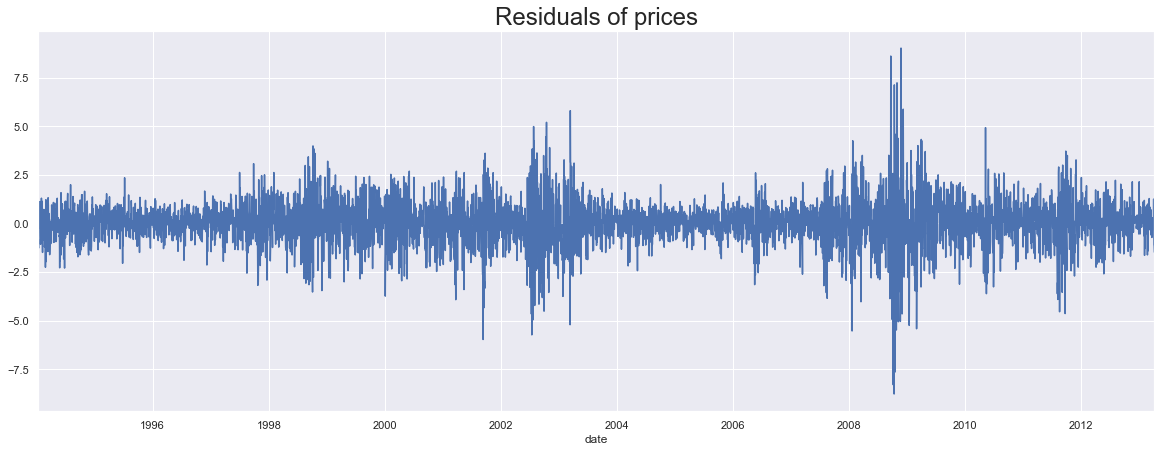

In [93]:
df.res_price[1:].plot(figsize=(20, 7))

plt.title("Residuals of prices", size=24)
plt.show()

# this looks random with no pattern

## ARIMA model

In [94]:
from statsmodels.tsa.arima_model import ARIMA

#### ARIMA(1,1,1)

In [95]:
model_ar_111_ma = ARIMA(df.market_value, order = (1,1,1))
results_ar_111_ma = model_ar_111_ma.fit()
results_ar_111_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27598.706
Method:                       css-mle   S.D. of innovations             59.140
Date:                Tue, 02 Feb 2021   AIC                          55205.413
Time:                        16:24:56   BIC                          55231.497
Sample:                    01-11-1994   HQIC                         55214.553
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5668      0.683      0.830      0.406      -0.771       1.905
ar.L1.D.market_value     0.7475      0.070     10.606      0.000       0.609       0.886
ma.L1.D.market_value    -0.7935      0.064    -12.321      0.000      -0.920      -0.667
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3379           +0.0000j            1.3379            0.0000
MA.1            1.2603           +0.0000j            1.2603            0.0000
-----------------------------------------------------------------------------
"""

#### Residuals of ARIMA(1,1,1)

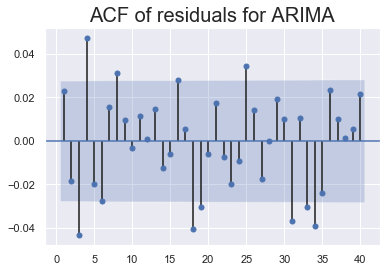

In [96]:
df['res_ar_1i1_ma_1'] = results_ar_111_ma.resid
sgt.plot_acf(df.res_ar_1i1_ma_1[1:], zero=False, lags = 40)
plt.title("ACF of residuals for ARIMA", size =20)
plt.show()

# ARIMAX

In [97]:
model_armix_11 = ARIMA(df.market_value, exog = df.spx, order= (1, 1, 1))
result_armix_11 = model_armix_11.fit()
result_armix_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27598.601
Method:                       css-mle   S.D. of innovations             59.139
Date:                Tue, 02 Feb 2021   AIC                          55207.201
Time:                        16:24:59   BIC                          55239.806
Sample:                    01-11-1994   HQIC                         55218.627
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6118      2.658     -0.230      0.818      -5.821       4.598
spx                      0.0011      0.002      0.459      0.646      -0.004       0.006
ar.L1.D.market_value     0.7461      0.071     10.552      0.000       0.608       0.885
ma.L1.D.market_value    -0.7920      0.065    -12.242      0.000      -0.919      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3403           +0.0000j            1.3403            0.0000
MA.1            1.2626           +0.0000j            1.2626            0.0000
-----------------------------------------------------------------------------
"""

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [99]:
model_sarmix = SARIMAX(df.market_value, exog = df.spx, order= (1, 0, 1), seasonal_order = (2,0,1,5))
result_sarmix = model_sarmix.fit()
result_sarmix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5020
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26714.980
Date:                           Tue, 02 Feb 2021   AIC                          53443.960
Time:                                   16:25:15   BIC                          53489.608
Sample:                               01-10-1994   HQIC                         53459.956
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6984      0.035     76.498      0.000       2.629       2.768
ar.L1          0.9999      0.000   2739.690      0.000       0.999       1.001
ma.L1         -0.3123      0.010    -32.725      0.000      -0.331      -0.294
ar.S.L5        0.9640      0.008    117.240      0.000       0.948       0.980
ar.S.L10       0.0358      0.007      5.322      0.000       0.023       0.049
ma.S.L5       -0.9992      0.007   -143.660      0.000      -1.013      -0.986
sigma2      2451.4999     27.960     87.679      0.000    2396.699    2506.301
===================================================================================
Ljung-Box (Q):                       91.13   Jarque-Bera (JB):              4130.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
df['sq_returns'] = df.returns.mul(df.returns)

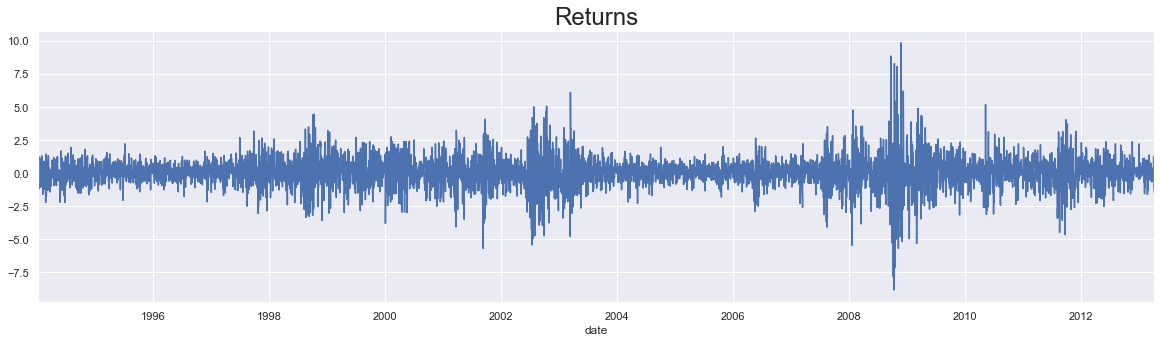

In [102]:
df.returns.plot(figsize=(20, 5))
plt.title("Returns", size = 24)
plt.show()

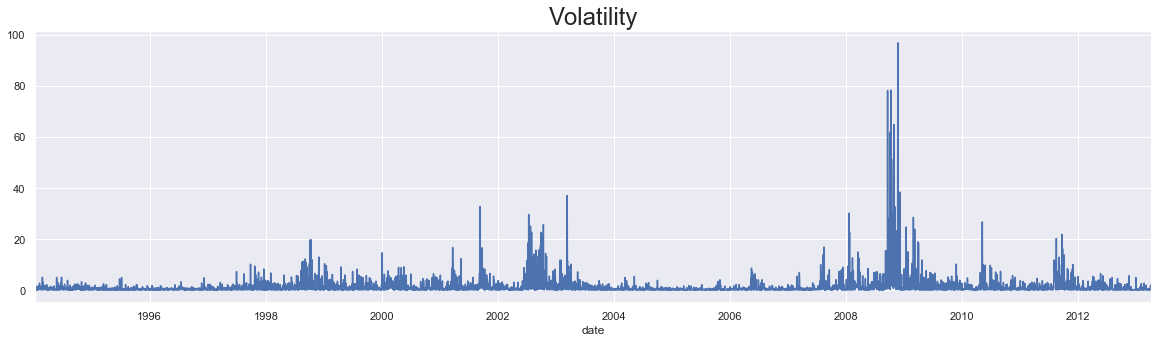

In [103]:
df.sq_returns.plot(figsize=(20, 5))
plt.title("Volatility", size = 24)
plt.show()

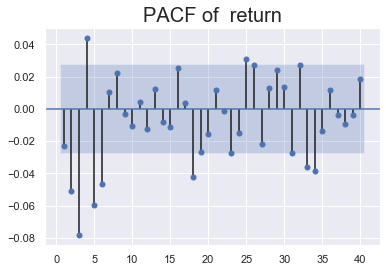

In [104]:
sgt.plot_pacf(df.returns[1:], lags=40, alpha=0.05, zero=False , method=('ols'))
plt.title("PACF of  return", size=20)
plt.show()

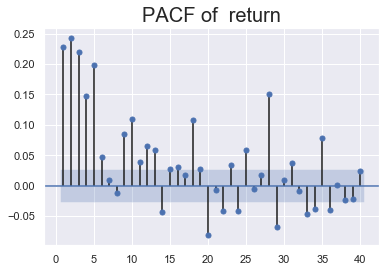

In [105]:
sgt.plot_pacf(df.sq_returns[1:], lags=40, alpha=0.05, zero=False , method=('ols'))
plt.title("PACF of volatility", size=20)
plt.show()

In [108]:
from arch import arch_model

In [109]:
model_arch_1 = arch_model(df.returns[1:])
result_arch_1 = model_arch_1.fit()
result_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6987.19990775261
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6984.011226986875
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6982.03221499447
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6973.943282620595
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6971.765564766643
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6970.71050713263
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6969.802896398458
Iteration:      8,   Func. Count:     60,   Neg. LLF: 6969.355257932946
Iteration:      9,   Func. Count:     67,   Neg. LLF: 6969.182772330493
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6969.136557281603
Iteration:     11,   Func. Count:     79,   Neg. LLF: 6969.110869359944
Iteration:     12,   Func. Count:     85,   Neg. LLF: 6969.110771669429
Iteration:     13,   Func. Count:     91,   Neg. LLF: 6969.110769978088
Optimization terminated successfully.    (Exit mode 0)
            

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -6969.11
Distribution:                  Normal   AIC:                           13946.2
Method:            Maximum Likelihood   BIC:                           13972.3
                                        No. Observations:                 5019
Date:                Tue, Feb 02 2021   Df Residuals:                     5015
Time:                        17:35:08   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.942  8.070e-05 [2.345e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.990e-03      3.638  2.753e-04 [5.015e-03,1.674e-02]
alpha[1]       0.0836  1.072e-02      7.800  6.191e-15   [6.261e-02,  0.105]
beta[1]        0.9088  1.149e-02     79.074      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

# The Simple ARCH(1)

In [110]:
model_arch_1 = arch_model(df.returns[1:], mean='Constant', vol="ARCH", p=1)
result_arch_1 = model_arch_1.fit()
result_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7659.786173150542
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7659.036029156086
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7658.199633561231
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7657.952133883601
Iteration:      5,   Func. Count:     34,   Neg. LLF: 7657.943205529719
Iteration:      6,   Func. Count:     39,   Neg. LLF: 7657.94319561175
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7657.943195611706
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -7657.94
Distribution:                  Normal   AIC:                           15321.9
Method:            Maximum Likelihood   BIC:                           15341.4
                                        No. Observations:                 5019
Date:                Tue, Feb 02 2021   Df Residuals:                     5016
Time:                        17:43:57   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0343  1.602e-02      2.142  3.222e-02 [2.911e-03,6.572e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9183  4.318e-02     21.267 2.297e-100 [  0.834,  1.003]
alpha[1]       0.3713  5.083e-02      7.306  2.762e-13 [  0.272,  0.471]
========================================================================

Covariance estimator: robust
"""

# Higher-Lag ARCH models

In [111]:
model_arch_2 = arch_model(df.returns[1:], mean='Constant', vol="ARCH", p=2)
result_arch_2 = model_arch_2.fit()
result_arch_2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7450.890591028925
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7449.670175208568
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7449.629659695503
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7448.697555276323
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7447.606382952662
Iteration:      6,   Func. Count:     49,   Neg. LLF: 7447.291249785147
Iteration:      7,   Func. Count:     55,   Neg. LLF: 7447.279814269196
Iteration:      8,   Func. Count:     61,   Neg. LLF: 7447.273254649999
Iteration:      9,   Func. Count:     67,   Neg. LLF: 7447.2732074619635
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7447.273207462282
            Iterations: 9
            Function evaluations: 67
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -7447.27
Distribution:                  Normal   AIC:                           14902.5
Method:            Maximum Likelihood   BIC:                           14928.6
                                        No. Observations:                 5019
Date:                Tue, Feb 02 2021   Df Residuals:                     5015
Time:                        17:53:19   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0486  1.400e-02      3.473  5.148e-04 [2.118e-02,7.606e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6961  3.566e-02     19.520  7.380e-85 [  0.626,  0.766]
alpha[1]       0.2218  3.498e-02      6.340  2.296e-10 [  0.153,  0.290]
alpha[2]       0.2786  3.642e-02      7.649  2.030e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

## GARCH Model

In [112]:
model_garch_2 = arch_model(df.returns[1:], mean='Constant', vol="GARCH", p=1, q=1)
result_garch_2 = model_garch_2.fit()
result_garch_2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6987.19990775261
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6984.011226986875
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6982.03221499447
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6973.943282620595
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6971.765564766643
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6970.71050713263
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6969.802896398458
Iteration:      8,   Func. Count:     60,   Neg. LLF: 6969.355257932946
Iteration:      9,   Func. Count:     67,   Neg. LLF: 6969.182772330493
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6969.136557281603
Iteration:     11,   Func. Count:     79,   Neg. LLF: 6969.110869359944
Iteration:     12,   Func. Count:     85,   Neg. LLF: 6969.110771669429
Iteration:     13,   Func. Count:     91,   Neg. LLF: 6969.110769978088
Optimization terminated successfully.    (Exit mode 0)
            

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -6969.11
Distribution:                  Normal   AIC:                           13946.2
Method:            Maximum Likelihood   BIC:                           13972.3
                                        No. Observations:                 5019
Date:                Wed, Feb 03 2021   Df Residuals:                     5015
Time:                        01:48:20   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.942  8.070e-05 [2.345e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.990e-03      3.638  2.753e-04 [5.015e-03,1.674e-02]
alpha[1]       0.0836  1.072e-02      7.800  6.191e-15   [6.261e-02,  0.105]
beta[1]        0.9088  1.149e-02     79.074      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

# Auto ARIMA


In [114]:
# ! pip install pmdarima